<a href="https://www.kaggle.com/code/busrapehlivan/bitki-deneme-1?scriptVersionId=205599657" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow and Keras for building CNN and Transfer Learning Models
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, Dense,Activation, Flatten, Dropout, BatchNormalization, Rescaling
from tensorflow.keras.layers import MaxPooling2D, MaxPool2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow import keras

# For handling image files
from PIL import Image
import cv2

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

# Checking TensorFlow version
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.16.1


In [2]:

import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [3]:
def create_dataset(folders, path):
    data = {'filepaths': [], 'labels': []}
    for folder in folders:
        folder_path = os.path.join(path, folder)
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path, file)
            data['filepaths'].append(file_path)
            data['labels'].append(folder)
    dataset = pd.DataFrame(data)
    return dataset


In [4]:
import os
import pandas as pd

def create_dataset(folders, base_path):
    filepaths = []
    labels = []
    
    # Belirtilen klasörler içinde gezin
    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        
        # Klasör içindeki tüm alt klasörleri ve dosyaları kontrol et
        for root, _, files in os.walk(folder_path):
            for file in files:
                if file.endswith(('jpg', 'jpeg', 'png')):  # Görsel dosyaları kontrol et
                    filepaths.append(os.path.join(root, file))
                    labels.append(folder)
    
    # Veri çerçevesini oluştur
    df = pd.DataFrame({
        'filepaths': filepaths,
        'labels': labels
    })
    
    return df

# Veri yolunu ve klasörleri belirtin
path = '/kaggle/input/tubitak-bitki/plant_tubitak'
folders = ['Medicago_sativa', 'Linum_tenuifolium', 'Ophrys_mammosa', 'Orchis_pallens', 'Vaccaria_hispanica']


# Veri setini oluştur
df = create_dataset(folders, path)
print(df.head())


                                           filepaths             labels
0  /kaggle/input/tubitak-bitki/plant_tubitak/Linu...  Linum_tenuifolium
1  /kaggle/input/tubitak-bitki/plant_tubitak/Linu...  Linum_tenuifolium
2  /kaggle/input/tubitak-bitki/plant_tubitak/Linu...  Linum_tenuifolium
3  /kaggle/input/tubitak-bitki/plant_tubitak/Linu...  Linum_tenuifolium
4  /kaggle/input/tubitak-bitki/plant_tubitak/Linu...  Linum_tenuifolium


In [5]:
print('--Veri Seti Hakkında Bilgiler--\n')
print(f'Görsel sayısı: {len(df)}\n')
print(f'Sınıf Sayısı: {len(df["labels"].unique())}\n')
print(f'Sınıflar: {df["labels"].unique()}')

--Veri Seti Hakkında Bilgiler--

Görsel sayısı: 2144

Sınıf Sayısı: 4

Sınıflar: ['Linum_tenuifolium' 'Ophrys_mammosa' 'Orchis_pallens'
 'Vaccaria_hispanica']


In [6]:
# her bir sınıfdaki verı sayısını göster
df.value_counts('labels')

labels
Linum_tenuifolium     571
Vaccaria_hispanica    554
Orchis_pallens        544
Ophrys_mammosa        475
Name: count, dtype: int64

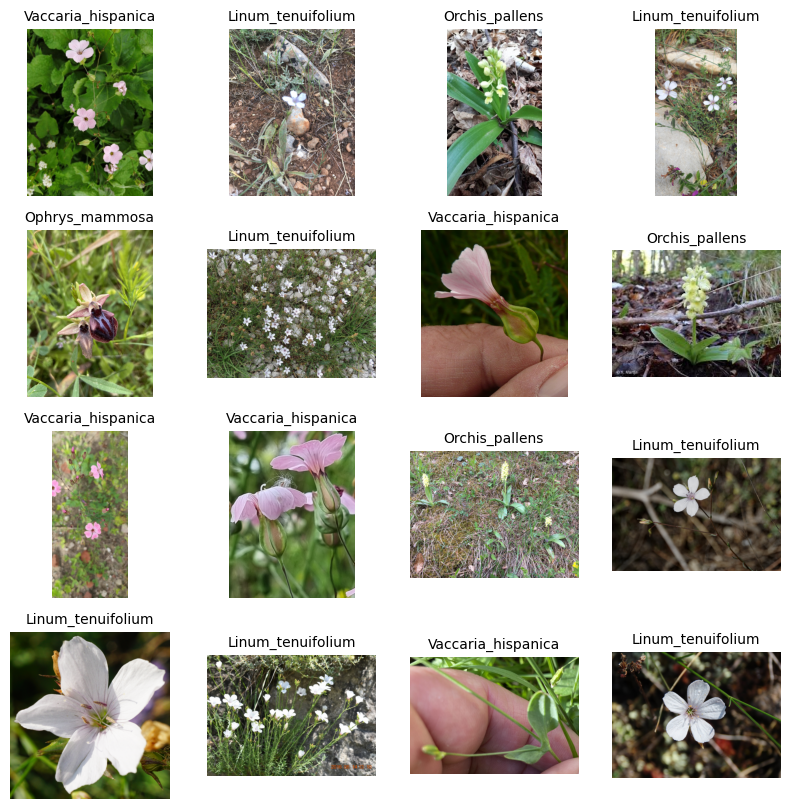

In [7]:
# Rastgele 4x4 görselleştir
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image

rows = 4
cols = 4
selected_indices = random.sample(range(len(df)), rows * cols)
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

gs = gridspec.GridSpec(rows, cols, wspace=1.0, hspace=1.0)
for i, idx in enumerate(selected_indices):
    row = i // cols
    col = i % cols
    img_path = df['filepaths'][idx] 
    label = df['labels'][idx]
    img = Image.open(img_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    axes[row, col].set_title(label, fontsize=10)

plt.show()


<Axes: ylabel='count'>

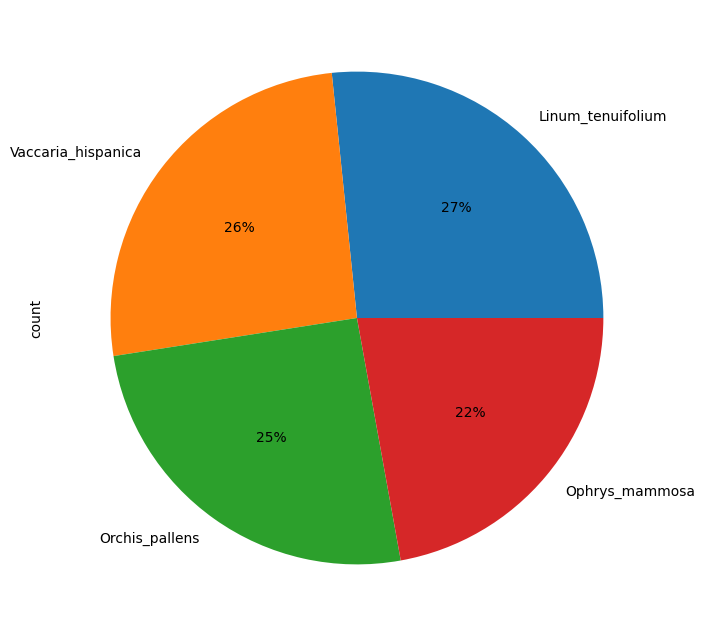

In [8]:
df.labels.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))

In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Veri yolunu belirtin
data_dir = '/kaggle/input/tubitak-bitki/plant_tubitak'

# Klasörleri listele
flower_categories = os.listdir(data_dir)

# Dosya yolları ve etiketler için boş listeler oluştur
filepaths = []
labels = []

# Listeleyi dosya yolları ve karşılık gelen etiketler ile doldur
for category in flower_categories:
    category_path = os.path.join(data_dir, category)
    for root, _, files in os.walk(category_path):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):  # Görsel dosyaları kontrol et
                file_path = os.path.join(root, file)
                filepaths.append(file_path)
                labels.append(category)

# Veri çerçevesini oluştur
df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

# Rastgele bir seed değeri belirle
seed = 42

# Veriyi eğitim ve test setlerine ayır (test seti %20)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=seed, stratify=df['labels'])

# Test setini doğrulama ve test setlerine ayır (%50-%50)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=seed, stratify=test_df['labels'])

# Her setteki satır sayısını yazdır
print(f"Eğitim seti boyutu: {len(train_df)}")
print(f"Doğrulama seti boyutu: {len(val_df)}")
print(f"Test seti boyutu: {len(test_df)}")

Eğitim seti boyutu: 1797
Doğrulama seti boyutu: 385
Test seti boyutu: 386


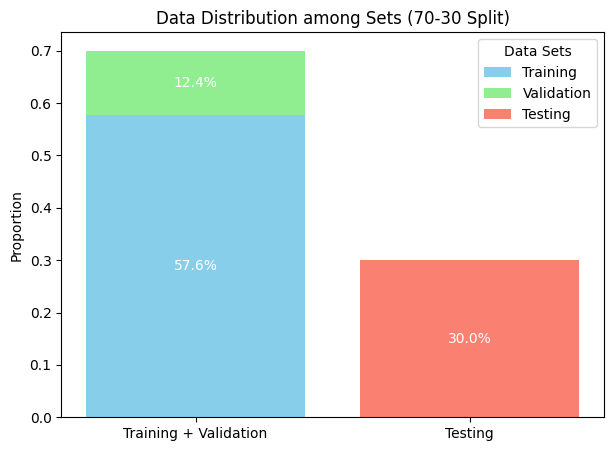

In [10]:
import matplotlib.pyplot as plt

# Data sizes for train, validation, and test sets
train_size = len(train_df)
val_size = len(val_df)
test_size = len(test_df)

# Calculate total size and ratios based on 70-30 split
total_size = train_size + val_size + test_size
train_val_size = train_size + val_size
train_val_ratio = 0.7
test_ratio = 0.3

# Proportion of train and validation within the training + validation set (assuming equal split)
train_ratio = (train_size / train_val_size) * train_val_ratio
val_ratio = (val_size / train_val_size) * train_val_ratio

# Prepare data for the stacked bar chart
data_sets = ['Training + Validation', 'Testing']
train_val_values = [train_ratio, 0]  # No training data in Testing group
val_values = [val_ratio, 0]          # No validation data in Testing group
test_values = [0, test_ratio]        # Only test data in Testing group

# Create the plot
fig, ax = plt.subplots(figsize=(7, 5))

# Define colors
colors = ['skyblue', 'lightgreen', 'salmon']

# Create bars
ax.bar(data_sets, train_val_values, color=colors[0], label='Training')
ax.bar(data_sets, val_values, bottom=train_val_values, color=colors[1], label='Validation')
ax.bar(data_sets, test_values, color=colors[2], label='Testing')

# Labels, title, and legend
ax.set_ylabel('Proportion')
ax.set_title('Data Distribution among Sets (70-30 Split)')
ax.legend(title='Data Sets', loc='upper right')

# Show percentages on bars
ax.text(0, train_ratio / 2, f'{train_ratio:.1%}', ha='center', va='center', color='white', fontsize=10)
ax.text(0, train_ratio + val_ratio / 2, f'{val_ratio:.1%}', ha='center', va='center', color='white', fontsize=10)
ax.text(1, test_ratio / 2, f'{test_ratio:.1%}', ha='center', va='center', color='white', fontsize=10)

plt.show()


In [11]:

# Define key parameters
data_dir = "/kaggle/input/tubitak-bitki/plant_tubitak"  # Path to the dataset
seed = 42 # For reproducibility

In [12]:
# TRAIN-TEST SPLIT: AS DATAFRAME

# List the categories (classes)
flower_categories = os.listdir(data_dir)

# Create empty lists for file paths and labels
filepaths = []
labels = []

# Populate lists with file paths and corresponding labels
for category in flower_categories:
    category_path = os.path.join(data_dir, category)
    file_list = os.listdir(category_path)
    for file in file_list:
        file_path = os.path.join(category_path, file)
        filepaths.append(file_path)
        labels.append(category)

# Create a DataFrame with filepaths and labels
df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

# Separate the data into training and test sets with stratification
train_df, test_df = train_test_split(df, test_size=0.3, random_state=seed, stratify=df['labels'])

# Split test_df into test_data and val_data (50% each, meaning 10% overall for both)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=seed, stratify=test_df['labels'])

# Print the number of rows in each set
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

Train size: 1799
Validation size: 385
Test size: 386


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from itertools import product

################# Model Evaluation ##################
def model_evaluation(model):
    # Evaluate on train, validation, and test generators
    train_score = model.evaluate(train_gen, verbose=1)
    valid_score = model.evaluate(val_gen, verbose=1)
    test_score = model.evaluate(test_gen, verbose=1)

    # Display the scores for train, validation, and test sets
    print('-' * 30)
    print("Training Loss: {:.4f}".format(train_score[0]))
    print("Training Accuracy: {:.4f}".format(train_score[1]))
    print('-' * 30)
    print("Validation Loss: {:.4f}".format(valid_score[0]))
    print("Validation Accuracy: {:.4f}".format(valid_score[1]))
    print('-' * 30)
    print("Testing Loss: {:.4f}".format(test_score[0]))
    print("Testing Accuracy: {:.4f}".format(test_score[1]))
    print('-' * 30)

############ Display Model Performance ##############
def model_performance(history):
    # Extract training and validation statistics
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    # Generate a range for epochs
    epochs = range(1, len(tr_acc) + 1)

    # Setup the plotting environment
    plt.figure(figsize=(16, 6))
    plt.style.use('fivethirtyeight')

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, tr_acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, tr_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

################ Confusion Matrix Plot ################
def plot_confusion_matrix(test_gen, y_pred):
    # Generate confusion matrix
    classes = list(test_gen.class_indices.keys())
    cm = confusion_matrix(test_gen.classes, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, cmap='Oranges')
    plt.title('Confusion Matrix', fontsize=14)
    plt.colorbar()

    # Set tick marks for classes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    # Display cell values on the confusion matrix
    thresh = cm.max() / 2
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=12,
                 color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.tight_layout()
    plt.show()


In [14]:
# Define key parameters for the model:

target_size=(224, 224)    # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32                 # Batch size for model training

# Create ImageDataGenerator for train and validation sets (without augmentation)

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0)  # Normalize pixel values between 0 and 1


# 1) Load training data
train_gen = image_gen.flow_from_dataframe(
    train_df,                    # DataFrame with train data
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,      # Resize images
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",     # For multi-class classification
    shuffle=True)                  # Shuffle training data


# 2) Load validation data
val_gen = image_gen.flow_from_dataframe(
    val_df,                       # DataFrame with validation data
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,      # Resize images
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",     # For multi-class classification
    shuffle=False)                # No need to shuffle validation data



# 3) Test Data
test_gen = image_gen.flow_from_dataframe(
    test_df,                      # DataFrame with test data
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,      # Resize images
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",     # For multi-class classification
    shuffle=False)                # No need to shuffle test data


# Print the number of samples in each set
print(f"Training data size: {train_gen.samples}")
print(f"Validation data size: {val_gen.samples}")
print(f"Test data size: {test_gen.samples}")

Found 1797 validated image filenames belonging to 5 classes.
Found 385 validated image filenames belonging to 5 classes.
Found 386 validated image filenames belonging to 5 classes.
Training data size: 1797
Validation data size: 385
Test data size: 386


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalMaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define key parameters for the model
image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size = (224, 224)     # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32              # Batch size for model training
epochs = 50                  # Number of epochs for training

# CNN Model Architecture
CNN = Sequential()

CNN.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu', padding='same'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.2))

# With regularization
CNN.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.3))

CNN.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))

# Global Max Pooling Layer
CNN.add(GlobalMaxPooling2D())

# ANN Layers with regularization
CNN.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
CNN.add(Dropout(0.4))

CNN.add(Dense(5, activation='softmax'))

# Compile the Model
CNN.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

CNN.summary()

# Callbacks Parameters: EarlyStopping and Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)

# Train the model
history = CNN.fit(
                train_gen,               # Rescaled
                validation_data=val_gen, # Rescaled
                batch_size=batch_size,
                epochs=epochs,
                callbacks=[early_stop, lr_scheduler]
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,149 (1.55 MB)

 Trainable params: 405,253 (1.55 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50


I0000 00:00:1730905045.827339      71 service.cc:145] XLA service 0x7fdc58005370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730905045.827394      71 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730905045.827398      71 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/57 ━━━━━━━━━━━━━━━━━━━━ 23:44 25s/step - accuracy: 0.1250 - loss: 9.8627

I0000 00:00:1730905062.247709      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 5/57 ━━━━━━━━━━━━━━━━━━━━ 2:07 2s/step - accuracy: 0.1632 - loss: 8.6625

I0000 00:00:1730905071.969860      71 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 24 bytes spill stores, 24 bytes spill loads



57/57 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.3011 - loss: 4.3797 - val_accuracy: 0.1922 - val_loss: 1.8724 - learning_rate: 5.0000e-04
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 559ms/step - accuracy: 0.5854 - loss: 1.3451 - val_accuracy: 0.2494 - val_loss: 1.8921 - learning_rate: 5.0000e-04
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 35s 569ms/step - accuracy: 0.6807 - loss: 1.0558 - val_accuracy: 0.2935 - val_loss: 1.8956 - learning_rate: 5.0000e-04
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 562ms/step - accuracy: 0.7605 - loss: 0.8916 - val_accuracy: 0.5844 - val_loss: 1.7416 - learning_rate: 5.0000e-04
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 568ms/step - accuracy: 0.7678 - loss: 0.8578 - val_accuracy: 0.4857 - val_loss: 1.5979 - learning_rate: 5.0000e-04
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 37s 578ms/step - accuracy: 0.8016 - loss: 0.7879 - val_accuracy: 0.6078 - val_loss: 1.3738 - learning_rate: 5.0000e-04
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 37s 584ms/step - accuracy: 0.8289 

In [16]:
train_score = CNN.evaluate(train_gen, verbose=1)
valid_score = CNN.evaluate(val_gen, verbose=1)
test_score = CNN.evaluate(test_gen, verbose=1)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 514ms/step - accuracy: 0.9533 - loss: 0.3293
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 465ms/step - accuracy: 0.9200 - loss: 0.4323
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 940ms/step - accuracy: 0.9114 - loss: 0.4326
--------------------
Train Loss:  0.3176725208759308
Train Accuracy:  0.9593767523765564
--------------------
Validation Loss:  0.4431734085083008
Validation Accuracy:  0.9272727370262146
--------------------
Test Loss:  0.46560484170913696
Test Accuracy:  0.9015544056892395
--------------------


Fine-Tuning for CNN

ImageGenarator with Augmentation

In [17]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)    # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32                 # Batch size for model training
epochs = 50                     # Number of epochs for training

In [18]:
# 1) Create ImageDataGenerator for train data With Augmentation
train_aug_generator = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values
    rotation_range=15,          # Randomly rotate images by 15 degrees
    width_shift_range=0.1,      # Horizontally shift images by 10%
    height_shift_range=0.1,     # Vertically shift images by 10%
    shear_range=0.1,            # Shear transformation reduced
    zoom_range=0.1,             # Zoom reduced to 10%
    horizontal_flip=True        # Randomly flip images horizontally
)

# Load training data with lighter augmentation
train_gen_aug = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical",
    shuffle=True
)

Found 1797 validated image filenames belonging to 5 classes.


In [19]:
# 2) CNN Model with Augmentation
CNN_aug = Sequential()

CNN_aug.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu', padding='same'))
CNN_aug.add(BatchNormalization())
CNN_aug.add(MaxPool2D(pool_size=(2, 2)))
CNN_aug.add(Dropout(0.2))

# with regularization
CNN_aug.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
CNN_aug.add(BatchNormalization())
CNN_aug.add(MaxPool2D(pool_size=(2, 2)))
CNN_aug.add(Dropout(0.3))

CNN_aug.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
CNN_aug.add(BatchNormalization())
CNN_aug.add(MaxPool2D(pool_size=(2, 2)))

# Global Max Pooling Layer
CNN_aug.add(GlobalMaxPooling2D())

# ANN Layers with regularization
CNN_aug.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
CNN_aug.add(Dropout(0.4))

CNN_aug.add(Dense(5, activation='softmax'))


# 3) Compile the Model
CNN_aug.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

CNN_aug.summary()

# 4) Callbacks Parameters: EarlyStopping and Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)


# 5) Train the model using augmented data
history = CNN_aug.fit(
                train_gen_aug,           #Rescaled + Augmented
                validation_data=val_gen, #Rescaled
                epochs=epochs,
                callbacks=[early_stop, lr_scheduler])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 256)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,149 (1.55 MB)

 Trainable params: 405,253 (1.55 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
 1/57 ━━━━━━━━━━━━━━━━━━━━ 13:02 14s/step - accuracy: 0.4000 - loss: 4.7947

I0000 00:00:1730906203.244543      72 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 24 bytes spill stores, 24 bytes spill loads



57/57 ━━━━━━━━━━━━━━━━━━━━ 66s 931ms/step - accuracy: 0.3211 - loss: 4.3913 - val_accuracy: 0.1870 - val_loss: 1.8669 - learning_rate: 5.0000e-04
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 52s 824ms/step - accuracy: 0.6696 - loss: 1.1142 - val_accuracy: 0.1948 - val_loss: 1.8575 - learning_rate: 5.0000e-04
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 52s 809ms/step - accuracy: 0.7539 - loss: 0.8795 - val_accuracy: 0.2494 - val_loss: 1.8427 - learning_rate: 5.0000e-04
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 803ms/step - accuracy: 0.7632 - loss: 0.8758 - val_accuracy: 0.2312 - val_loss: 1.8316 - learning_rate: 5.0000e-04
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 790ms/step - accuracy: 0.8012 - loss: 0.7901 - val_accuracy: 0.1688 - val_loss: 1.7637 - learning_rate: 5.0000e-04
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 52s 815ms/step - accuracy: 0.8220 - loss: 0.7112 - val_accuracy: 0.2442 - val_loss: 1.7006 - learning_rate: 5.0000e-04
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 56s 886ms/step - accuracy: 0.81

Evaluating the Model

In [20]:
train_score = CNN_aug.evaluate(train_gen_aug, verbose=1)
valid_score = CNN_aug.evaluate(val_gen, verbose=1)
test_score = CNN_aug.evaluate(test_gen, verbose=1)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 889ms/step - accuracy: 0.9618 - loss: 0.2988
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 529ms/step - accuracy: 0.9195 - loss: 0.4046
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 585ms/step - accuracy: 0.9288 - loss: 0.3694
--------------------
Train Loss:  0.2996904253959656
Train Accuracy:  0.9610461592674255
--------------------
Validation Loss:  0.414231538772583
Validation Accuracy:  0.9194805026054382
--------------------
Test Loss:  0.384557843208313
Test Accuracy:  0.9300518035888672
--------------------


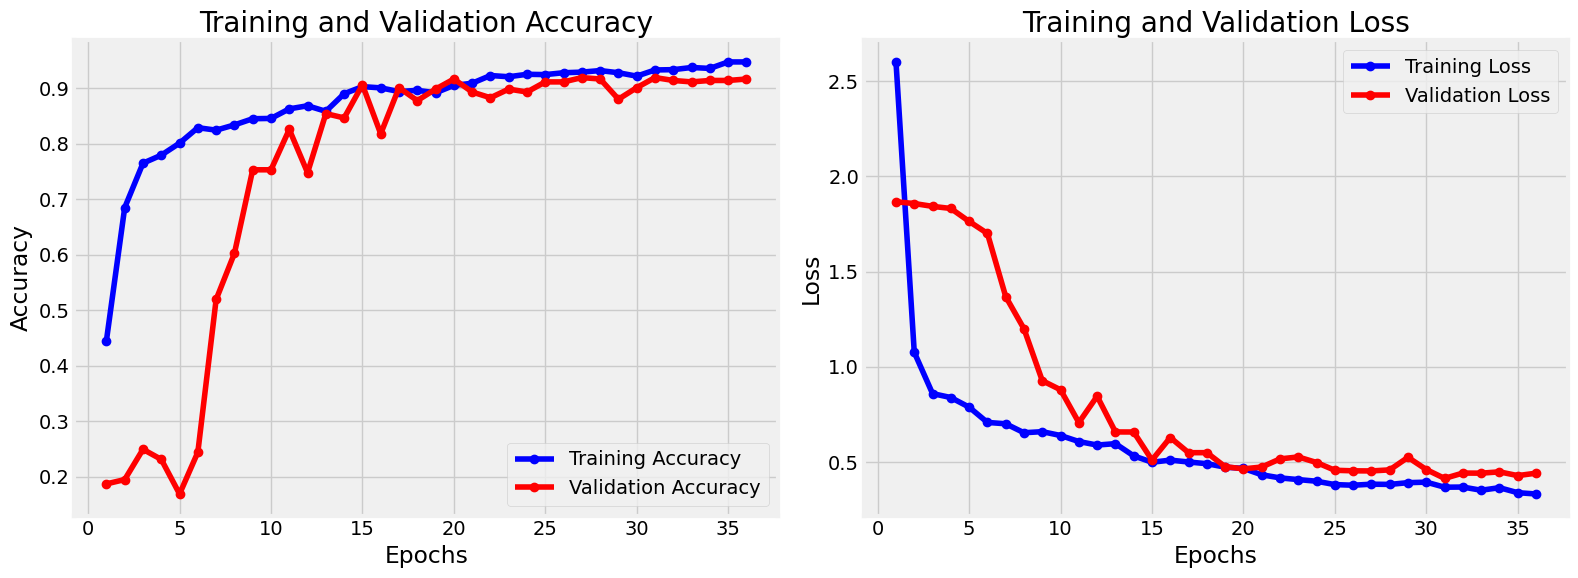

In [21]:
 model_performance(history)

In [22]:
preds = CNN.predict(test_gen)

predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen.classes, predictions))

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 532ms/step
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.98      0.76      0.86        86
           2       0.96      0.97      0.97        72
           3       0.84      0.95      0.89        82
           4       0.83      0.94      0.88        83

    accuracy                           0.90       386
   macro avg       0.91      0.90      0.90       386
weighted avg       0.91      0.90      0.90       386



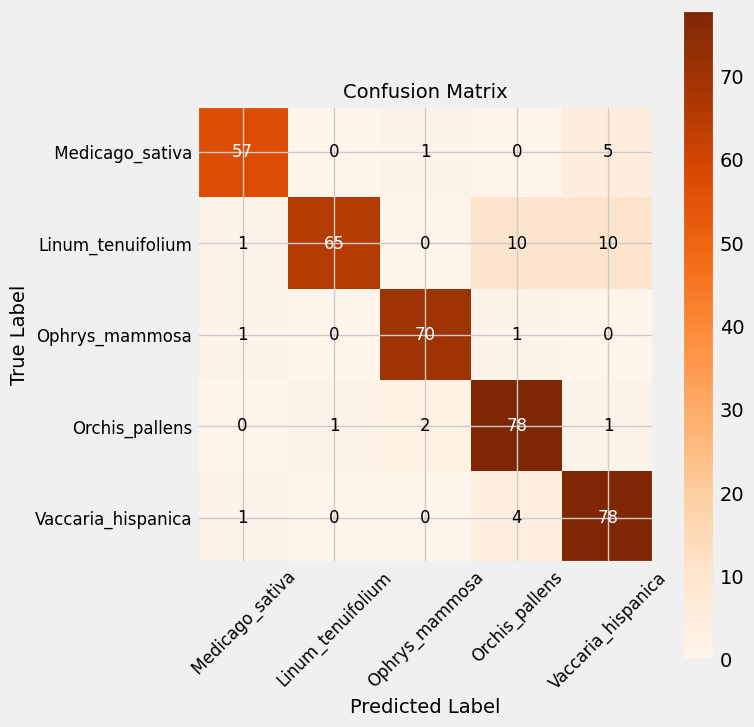

In [23]:

plot_confusion_matrix(test_gen, predictions)

In [24]:
# Save the model in Keras format
CNN_aug.save('CNN_model.keras')

In [25]:
# Load the model in Keras format
CNN_model = tf.keras.models.load_model('/kaggle/working/CNN_model.keras')

**VGG16**

In [26]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)    # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32                 # Batch size for model training

In [27]:
# ImageGenerator:

from tensorflow.keras.applications.vgg16 import preprocess_input

# Create ImageDataGenerator for train data with augmentation
train_aug_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocessing for VGG16
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training data
train_gen_vgg = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True)

# Validation and test data for VGG (with rescaling and zero-centering)
val_test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load validation data
val_gen_vgg = val_test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False)

# Load test data
test_gen_vgg = val_test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False)

Found 1797 validated image filenames belonging to 5 classes.
Found 385 validated image filenames belonging to 5 classes.
Found 386 validated image filenames belonging to 5 classes.


VGG16 Base Model:

In [28]:
# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True)

In [29]:
# VGG16 Base Model Architecture

from tensorflow.keras.applications import VGG16

# VGG16 Pre-trained Model
pretrained_model = VGG16(
    input_shape=image_shape,
    include_top=False,
    pooling='avg',
    weights="imagenet")

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer
inputs = keras.Input(shape=image_shape)
x = pretrained_model(inputs)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
VGG16_base = keras.Model(inputs, outputs)

# Compile the model
VGG16_base.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'])

VGG16_base.summary()

# Callbacks:
# Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_vgg16_weights.weights.h5",
    save_best_only=True,            # Save only the best weights
    monitor="val_loss",             # Monitor validation loss
    mode="min",                     # minimize validation loss
    save_weights_only=True)          # Save only the weights,not the model


# Train the model with frozen layers
history = VGG16_base.fit(
    train_gen_vgg,
    validation_data=val_gen_vgg,
    epochs=20,                   # Small epoch for base model
    callbacks=[early_stop, checkpoint_cb])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,717,253 (56.14 MB)

 Trainable params: 2,565 (10.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 76s 994ms/step - accuracy: 0.1472 - loss: 4.5458 - val_accuracy: 0.1506 - val_loss: 4.4469
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 60s 949ms/step - accuracy: 0.1850 - loss: 3.4717 - val_accuracy: 0.2078 - val_loss: 3.7010
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 924ms/step - accuracy: 0.2861 - loss: 2.7416 - val_accuracy: 0.2494 - val_loss: 3.1711
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 930ms/step - accuracy: 0.3106 - loss: 2.3690 - val_accuracy: 0.2857 - val_loss: 2.7982
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 930ms/step - accuracy: 0.3681 - loss: 2.0400 - val_accuracy: 0.3221 - val_loss: 2.4997
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 60s 947ms/step - accuracy: 0.4060 - loss: 1.8670 - val_accuracy: 0.3662 - val_loss: 2.2100
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 60s 934ms/step - accuracy: 0.4454 - loss: 1.6775 - val_accuracy: 0.3948 - val_loss: 2.0077
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 914ms/step - accuracy: 0.4438 - loss: 1.5908 - val_accu

In [30]:
# Modelin Eğitim ve Doğrulama Verileri Üzerindeki Performansını Değerlendirin
train_score = VGG16_base.evaluate(train_gen_vgg)
valid_score = VGG16_base.evaluate(val_gen_vgg)

# Test Verileri Üzerindeki Performansını Değerlendirin
test_score = VGG16_base.evaluate(test_gen_vgg)

# Sonuçları Yazdırın
print('-' * 20)
print("Train Loss:", train_score[0])
print("Train Accuracy:", train_score[1])
print('-' * 20)
print("Validation Loss:", valid_score[0])
print("Validation Accuracy:", valid_score[1])
print('-' * 20)
print("Test Loss:", test_score[0])
print("Test Accuracy:", test_score[1])
print('-' * 20)


57/57 ━━━━━━━━━━━━━━━━━━━━ 52s 910ms/step - accuracy: 0.7063 - loss: 0.8726
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 563ms/step - accuracy: 0.7348 - loss: 0.7882
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 724ms/step - accuracy: 0.6834 - loss: 0.9855
--------------------
Train Loss: 0.8167504668235779
Train Accuracy: 0.7095158696174622
--------------------
Validation Loss: 0.9287431240081787
Validation Accuracy: 0.6961038708686829
--------------------
Test Loss: 0.985038161277771
Test Accuracy: 0.6761658191680908
--------------------


Fine-Tuning

In [31]:
# Unfreeze the VGG16 model layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
VGG16_base.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),  # even lower lr
    metrics=['accuracy'])

VGG16_base.summary()

# Fine-tune the model (with all layers trainable)
history_vgg = VGG16_base.fit(
    train_gen_vgg,
    validation_data=val_gen_vgg,
    epochs=50,                   # Fine-tuning with more epochs
    callbacks=[early_stop, checkpoint_cb])

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,717,253 (56.14 MB)

 Trainable params: 14,717,253 (56.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
35/57 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7992 - loss: 0.5784   

I0000 00:00:1730909650.419564      72 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_10', 208 bytes spill stores, 208 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_9', 20 bytes spill stores, 20 bytes spill loads



57/57 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8150 - loss: 0.5373 - val_accuracy: 0.8805 - val_loss: 0.4021
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 63s 990ms/step - accuracy: 0.9423 - loss: 0.2024 - val_accuracy: 0.9169 - val_loss: 0.2388
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 972ms/step - accuracy: 0.9652 - loss: 0.1039 - val_accuracy: 0.9377 - val_loss: 0.2218
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 978ms/step - accuracy: 0.9702 - loss: 0.0782 - val_accuracy: 0.9325 - val_loss: 0.2455
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 977ms/step - accuracy: 0.9813 - loss: 0.0524 - val_accuracy: 0.9455 - val_loss: 0.1982
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 957ms/step - accuracy: 0.9909 - loss: 0.0325 - val_accuracy: 0.9403 - val_loss: 0.2024
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 969ms/step - accuracy: 0.9932 - loss: 0.0241 - val_accuracy: 0.9481 - val_loss: 0.1730
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 950ms/step - accuracy: 0.9855 - loss: 0.0584 - val_accuracy: 0.9532 -

Evaluating the Model

In [32]:
train_score = VGG16_base.evaluate(train_gen_vgg, verbose=1)
valid_score = VGG16_base.evaluate(val_gen_vgg, verbose=1)
test_score = VGG16_base.evaluate(test_gen_vgg, verbose=1)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

57/57 ━━━━━━━━━━━━━━━━━━━━ 50s 876ms/step - accuracy: 0.9979 - loss: 0.0064
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 529ms/step - accuracy: 0.9668 - loss: 0.1275
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 604ms/step - accuracy: 0.9646 - loss: 0.1370
--------------------
Train Loss:  0.007224017288535833
Train Accuracy:  0.99721759557724
--------------------
Validation Loss:  0.12555453181266785
Validation Accuracy:  0.9636363387107849
--------------------
Test Loss:  0.15489719808101654
Test Accuracy:  0.9663212299346924
--------------------


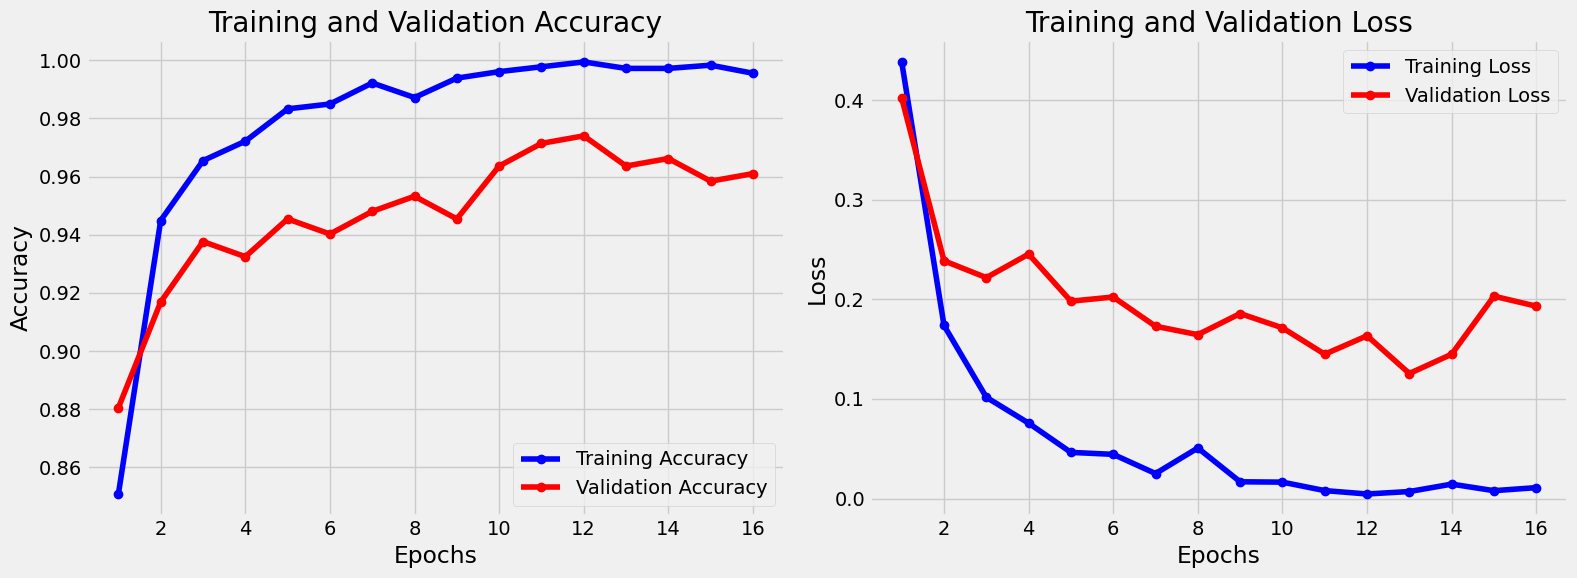

In [33]:
 model_performance(history_vgg)

Predictions

In [34]:
preds =  VGG16_base.predict(test_gen_vgg)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_vgg.classes, predictions))

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 539ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.98      0.97      0.97        86
           2       0.97      1.00      0.99        72
           3       0.98      0.98      0.98        82
           4       0.96      0.92      0.94        83

    accuracy                           0.97       386
   macro avg       0.97      0.97      0.97       386
weighted avg       0.97      0.97      0.97       386



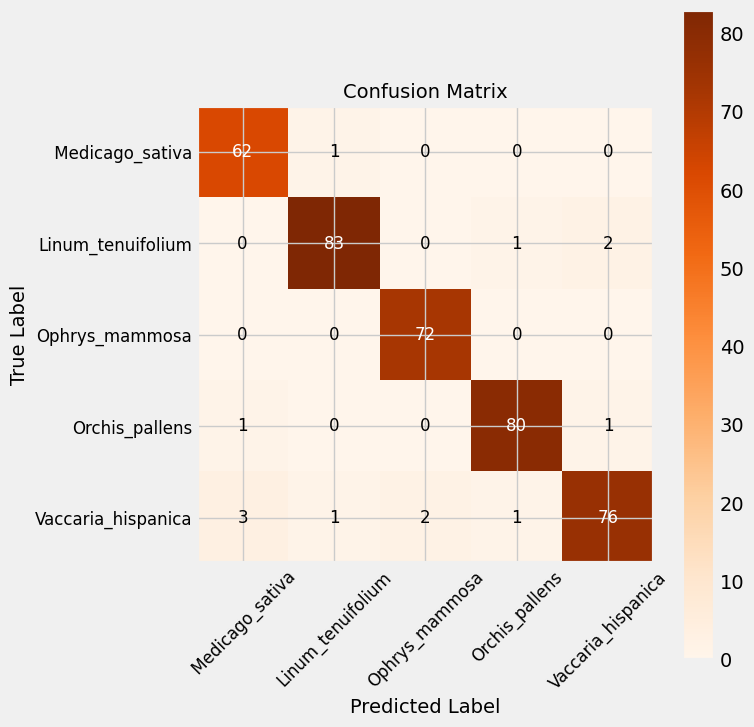

In [35]:
plot_confusion_matrix(test_gen_vgg, predictions)

In [36]:
# Save the model in Keras format
VGG16_base.save('VGG16_model.keras')

In [37]:
# Load the model in Keras format
VGG16_model = tf.keras.models.load_model('/kaggle/working/VGG16_model.keras')


InceptionV3

In [38]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)       # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32              # Batch size for model training

In [39]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

# ImageGenerator:

# Create ImageDataGenerator for train data with augmentation
train_aug_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocessing for InceptionV3
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training data
train_gen_incep = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Validation and test data for InceptionV3 (with rescaling to [-1, 1])
val_test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load validation data
val_gen_incep = val_test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Load test data
test_gen_incep = val_test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 1797 validated image filenames belonging to 5 classes.
Found 385 validated image filenames belonging to 5 classes.
Found 386 validated image filenames belonging to 5 classes.


InceptionV3 Base Model:

In [40]:
# Callbacks Parameters:
# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True)

In [41]:
# InceptionV3 Base Model Architecture

from tensorflow.keras.applications import InceptionV3

# InceptionV3 Pre-trained Model
pretrained_model = InceptionV3(
    input_shape=image_shape,
    include_top=False,    # Exclude top layer
    pooling='avg',        # Apply average pooling to reduce the output dims
    weights="imagenet"    # Load pre-trained weights from ImageNet
)

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer
inputs = keras.Input(shape=image_shape) #(default input size was 299x299)

# Pass the inputs through the pretrained InceptionV3 model
x = pretrained_model(inputs)

# Output layer (5 units for 5 flower classes with softmax activation)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
InceptionV3_model = keras.Model(inputs, outputs)

# Compile the model
InceptionV3_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy'])

InceptionV3_model.summary()

# Callbacks:
# Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_inceptionv3_weights.weights.h5",  # Path to save the best weights
    save_best_only=True,                    # Save only the best weights
    monitor="val_loss",                     # Monitor validation loss
    mode="min",                             # Minimize validation loss
    save_weights_only=True)                  # Save only the weights, not the entire model


# Train the model with frozen layers
history_incep = InceptionV3_model.fit(
    train_gen_incep,
    validation_data=val_gen_incep,
    epochs=20,                    # Set smaller epochs for initial training
    callbacks=[early_stop, checkpoint_cb,lr_scheduler])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 2048)           │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │        10,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,813,029 (83.21 MB)

 Trainable params: 10,245 (40.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.4736 - loss: 1.3286 - val_accuracy: 0.8182 - val_loss: 0.5369 - learning_rate: 0.0010
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 932ms/step - accuracy: 0.8317 - loss: 0.4842 - val_accuracy: 0.8494 - val_loss: 0.4359 - learning_rate: 0.0010
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 933ms/step - accuracy: 0.8692 - loss: 0.3917 - val_accuracy: 0.8753 - val_loss: 0.3552 - learning_rate: 0.0010
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 58s 905ms/step - accuracy: 0.9028 - loss: 0.3187 - val_accuracy: 0.8779 - val_loss: 0.3666 - learning_rate: 0.0010
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 56s 876ms/step - accuracy: 0.8978 - loss: 0.3055 - val_accuracy: 0.8779 - val_loss: 0.3543 - learning_rate: 0.0010
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 54s 848ms/step - accuracy: 0.9118 - loss: 0.2754 - val_accuracy: 0.8831 - val_loss: 0.3388 - learning_rate: 0.0010
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 54s 854ms/step - accuracy: 0.9003 - loss: 0.289

In [42]:
test_loss, test_accuracy = InceptionV3_model.evaluate(test_gen_incep)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 881ms/step - accuracy: 0.9309 - loss: 0.1999
Test Loss: 0.2466137707233429
Test Accuracy: 0.9170984625816345


Fine-Tuning

In [43]:
# Fine-tuning step:
# Unfreeze all layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
InceptionV3_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),  # Lower lr
    metrics=['accuracy']
)

InceptionV3_model.summary()

# Fine-tune the model (with all layers trainable)
history_incep = InceptionV3_model.fit(
    train_gen_incep,
    validation_data=val_gen_incep,
    epochs=50,                    # Fine-tuning with more epochs
    callbacks=[early_stop, checkpoint_cb,lr_scheduler])

Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 2048)           │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │        10,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,813,029 (83.21 MB)

 Trainable params: 21,778,597 (83.08 MB)

 Non-trainable params: 34,432 (134.50 KB)

Epoch 1/50
27/57 ━━━━━━━━━━━━━━━━━━━━ 23s 793ms/step - accuracy: 0.7496 - loss: 0.6761

I0000 00:00:1730911976.809136      73 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 72 bytes spill stores, 72 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 16 bytes spill stores, 16 bytes spill loads



57/57 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.7974 - loss: 0.5502 - val_accuracy: 0.8623 - val_loss: 0.6364 - learning_rate: 1.0000e-04
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 55s 848ms/step - accuracy: 0.9419 - loss: 0.1354 - val_accuracy: 0.9221 - val_loss: 0.2707 - learning_rate: 1.0000e-04
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 56s 880ms/step - accuracy: 0.9757 - loss: 0.0742 - val_accuracy: 0.9377 - val_loss: 0.2141 - learning_rate: 1.0000e-04
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 57s 902ms/step - accuracy: 0.9789 - loss: 0.0607 - val_accuracy: 0.9429 - val_loss: 0.2004 - learning_rate: 1.0000e-04
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 57s 889ms/step - accuracy: 0.9842 - loss: 0.0469 - val_accuracy: 0.9481 - val_loss: 0.1768 - learning_rate: 1.0000e-04
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 56s 879ms/step - accuracy: 0.9898 - loss: 0.0298 - val_accuracy: 0.9584 - val_loss: 0.1697 - learning_rate: 1.0000e-04
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 57s 897ms/step - accuracy: 0.9938

Evaluating the Model

In [44]:
train_score = InceptionV3_model.evaluate(train_gen_incep)
valid_score = InceptionV3_model.evaluate(val_gen_incep)
test_score = InceptionV3_model.evaluate(test_gen_incep)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

57/57 ━━━━━━━━━━━━━━━━━━━━ 49s 854ms/step - accuracy: 0.9966 - loss: 0.0133
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 480ms/step - accuracy: 0.9624 - loss: 0.1360
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 674ms/step - accuracy: 0.9488 - loss: 0.1552
--------------------
Train Loss:  0.015148019418120384
Train Accuracy:  0.9955481290817261
--------------------
Validation Loss:  0.13416999578475952
Validation Accuracy:  0.9584415555000305
--------------------
Test Loss:  0.17572474479675293
Test Accuracy:  0.9481865167617798
--------------------


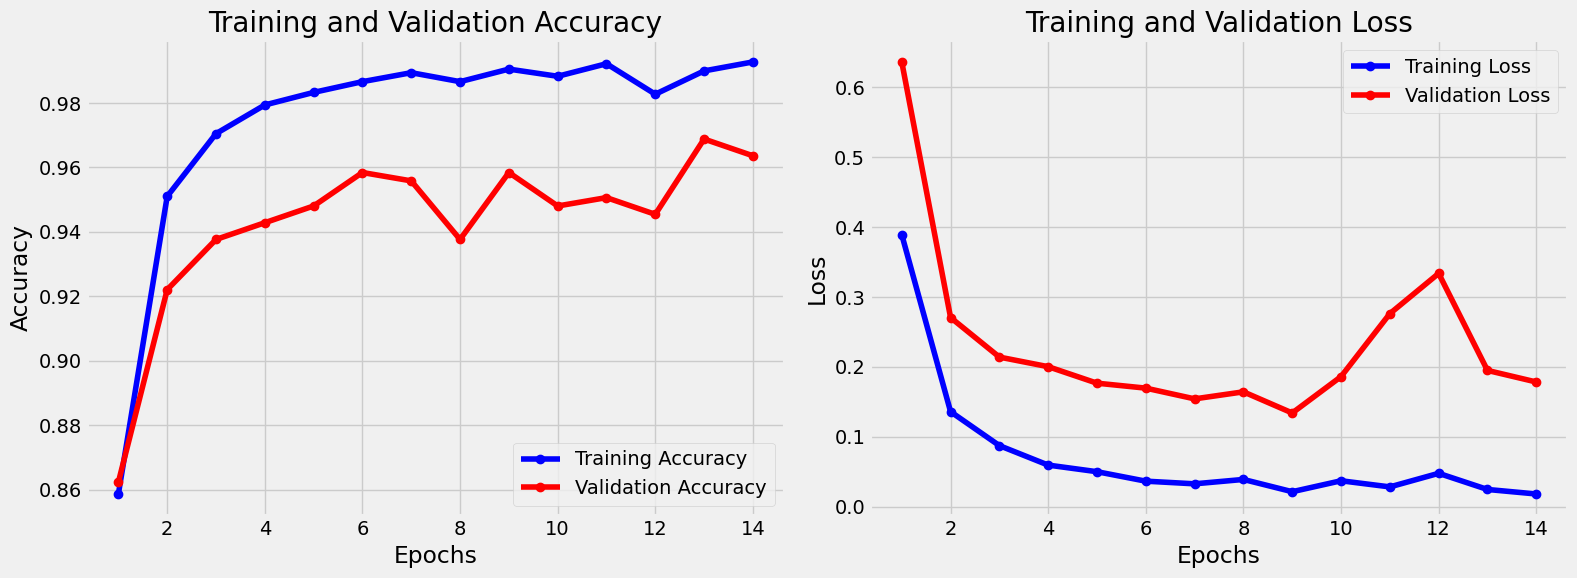

In [45]:
 model_performance(history_incep)


Predictions

In [46]:
preds = InceptionV3_model.predict(test_gen_incep)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_incep.classes, predictions))

13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 834ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.93      0.94      0.94        86
           2       0.96      0.99      0.97        72
           3       0.99      0.93      0.96        82
           4       0.93      0.94      0.93        83

    accuracy                           0.95       386
   macro avg       0.95      0.95      0.95       386
weighted avg       0.95      0.95      0.95       386



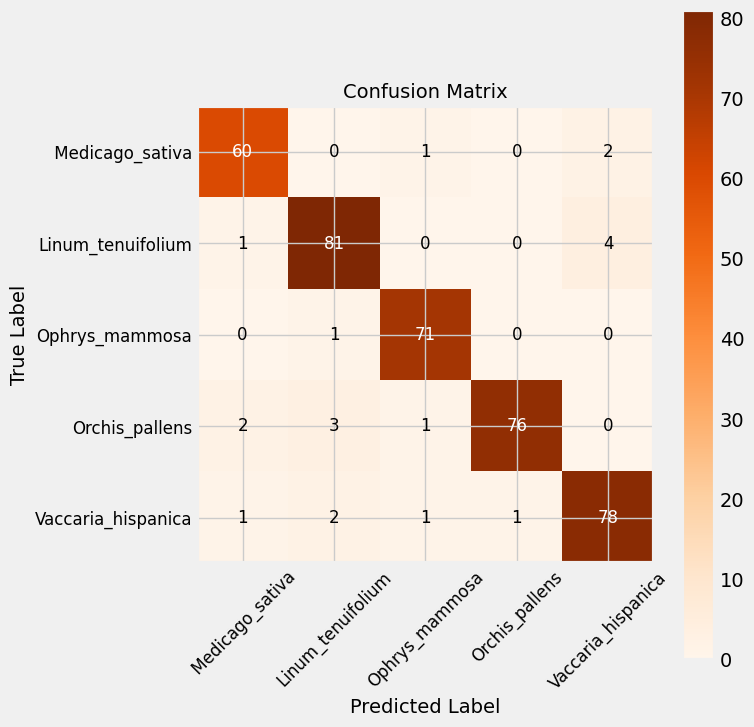

In [47]:
plot_confusion_matrix(test_gen_incep, predictions)

In [48]:

# Save the model in Keras format
InceptionV3_model.save('InceptionV3_model.keras')

In [49]:
# Load the model in Keras format
InceptionV3_model = tf.keras.models.load_model('/kaggle/working/InceptionV3_model.keras')

NASNetMobile

In [50]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)       # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32              # Batch size for model training

In [51]:
from tensorflow.keras.applications.nasnet import preprocess_input

# ImageGenerator

# Create ImageDataGenerator for train data with augmentation
train_aug_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocessing for NASNetMobile
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training data
train_gen_nasnet = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,   # Resize images to target size (default 224x224 for NASNetMobile)
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Validation and test data for NASNetMobile (with rescaling to [0, 1])
val_test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load validation data
val_gen_nasnet = val_test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Load test data
test_gen_nasnet = val_test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 1797 validated image filenames belonging to 5 classes.
Found 385 validated image filenames belonging to 5 classes.
Found 386 validated image filenames belonging to 5 classes.


NasNetMobile Base Model:

In [52]:
# Callbacks Parameters:

# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

In [53]:
from tensorflow.keras.applications import NASNetMobile

# NASNetMobile Pre-trained Model
pretrained_model = NASNetMobile(
    input_shape=image_shape,
    include_top=False,         # Exclude top layer
    pooling='avg',             # Apply average pooling to reduce the output dims
    weights="imagenet"         # Load pre-trained weights from ImageNet
)

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer: (NASNetMobile default input size is 224x224)
inputs = keras.Input(shape=image_shape)

# Pass the inputs through the pretrained NASNetMobile model
x = pretrained_model(inputs)

# Output layer (5 units for 5 flower classes with softmax activation)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
NASNetMobile_model = keras.Model(inputs, outputs)

# Compile the model
NASNetMobile_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'])

NASNetMobile_model.summary()

# Callbacks:
# Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_nasnetmobile_weights.weights.h5",  # Path to save the best weights
    save_best_only=True,                     # Save only the best weights
    monitor="val_loss",                      # Monitor validation loss
    mode="min",                              # Minimize validation loss
    save_weights_only=True)                  # Save only the weights, not the entire model


# Train the model with frozen layers
history_nasnet = NASNetMobile_model.fit(
    train_gen_nasnet,
    validation_data=val_gen_nasnet,
    epochs=20,                     # Set smaller epochs
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ NASNet (Functional)             │ (None, 1056)           │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │         5,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,275,001 (16.31 MB)

 Trainable params: 5,285 (20.64 KB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.2571 - loss: 1.6543 - val_accuracy: 0.4156 - val_loss: 1.4361 - learning_rate: 1.0000e-04
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 827ms/step - accuracy: 0.4548 - loss: 1.3629 - val_accuracy: 0.5610 - val_loss: 1.2585 - learning_rate: 1.0000e-04
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 825ms/step - accuracy: 0.5652 - loss: 1.2181 - val_accuracy: 0.6312 - val_loss: 1.1286 - learning_rate: 1.0000e-04
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 834ms/step - accuracy: 0.6382 - loss: 1.1087 - val_accuracy: 0.6727 - val_loss: 1.0320 - learning_rate: 1.0000e-04
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 834ms/step - accuracy: 0.6766 - loss: 0.9955 - val_accuracy: 0.6935 - val_loss: 0.9454 - learning_rate: 1.0000e-04
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 826ms/step - accuracy: 0.7272 - loss: 0.9150 - val_accuracy: 0.7091 - val_loss: 0.8838 - learning_rate: 1.0000e-04
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 52s 821ms/step - accur

In [54]:
test_loss, test_accuracy = NASNetMobile_model.evaluate(test_gen_nasnet)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8666 - loss: 0.4585
Test Loss: 0.5002644062042236
Test Accuracy: 0.8471502661705017


Fine-Tuning

In [55]:
# Fine-tuning step:
# Unfreeze all layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
NASNetMobile_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy'])

NASNetMobile_model.summary()

# Fine-tune the model (with all layers trainable)
history_nasnet = NASNetMobile_model.fit(
    train_gen_nasnet,
    validation_data=val_gen_nasnet,
    epochs=50,
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ NASNet (Functional)             │ (None, 1056)           │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │         5,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,275,001 (16.31 MB)

 Trainable params: 4,238,263 (16.17 MB)

 Non-trainable params: 36,738 (143.51 KB)

Epoch 1/50
32/57 ━━━━━━━━━━━━━━━━━━━━ 19s 774ms/step - accuracy: 0.6375 - loss: 0.9244

I0000 00:00:1730914348.885704      72 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_2', 104 bytes spill stores, 104 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_slice_fusion_10', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_slice_fusion_5', 28 bytes spill stores, 28 bytes spill loads



57/57 ━━━━━━━━━━━━━━━━━━━━ 359s 3s/step - accuracy: 0.6540 - loss: 0.8953 - val_accuracy: 0.8260 - val_loss: 0.4742 - learning_rate: 1.0000e-05
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 55s 866ms/step - accuracy: 0.7993 - loss: 0.6163 - val_accuracy: 0.8597 - val_loss: 0.4218 - learning_rate: 1.0000e-05
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 55s 880ms/step - accuracy: 0.8583 - loss: 0.4839 - val_accuracy: 0.8753 - val_loss: 0.3804 - learning_rate: 1.0000e-05
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 55s 868ms/step - accuracy: 0.8667 - loss: 0.4124 - val_accuracy: 0.8883 - val_loss: 0.3548 - learning_rate: 1.0000e-05
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 55s 870ms/step - accuracy: 0.8954 - loss: 0.3542 - val_accuracy: 0.8935 - val_loss: 0.3359 - learning_rate: 1.0000e-05
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 55s 871ms/step - accuracy: 0.8984 - loss: 0.3100 - val_accuracy: 0.8935 - val_loss: 0.3261 - learning_rate: 1.0000e-05
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 55s 869ms/step - accuracy: 0.9249

Evaluating the Model

In [56]:
train_score = NASNetMobile_model.evaluate(train_gen_nasnet)
valid_score = NASNetMobile_model.evaluate(val_gen_nasnet)
test_score = NASNetMobile_model.evaluate(test_gen_nasnet)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9737 - loss: 0.0843
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 583ms/step - accuracy: 0.9449 - loss: 0.1781
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9473 - loss: 0.1737
--------------------
Train Loss:  0.07628872990608215
Train Accuracy:  0.9766277074813843
--------------------
Validation Loss:  0.18146008253097534
Validation Accuracy:  0.9402597546577454
--------------------
Test Loss:  0.18939189612865448
Test Accuracy:  0.9378238320350647
--------------------


model_performance(history_nasnet)

Predictions

In [57]:
preds = NASNetMobile_model.predict(test_gen_nasnet)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_nasnet.classes, predictions))

13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.99      0.85      0.91        86
           2       0.92      1.00      0.96        72
           3       0.96      0.99      0.98        82
           4       0.86      0.94      0.90        83

    accuracy                           0.94       386
   macro avg       0.94      0.94      0.94       386
weighted avg       0.94      0.94      0.94       386



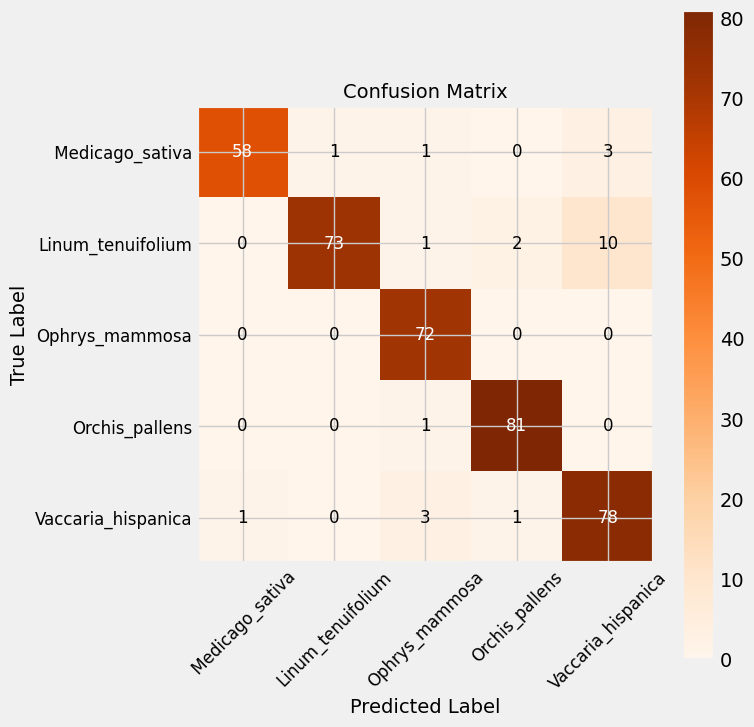

In [58]:

plot_confusion_matrix(test_gen_nasnet, predictions)

In [59]:
# Save the model in Keras format
NASNetMobile_model.save('NasNetMobile_model.keras')

In [60]:
# Load the model in Keras format
NASNetMobile_model = tf.keras.models.load_model('/kaggle/working/NasNetMobile_model.keras')

EfficientNetB3

In [61]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)       # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32              # Batch size for model training

In [62]:
from tensorflow.keras.applications.efficientnet import preprocess_input

# ImageGenerator

# Create ImageDataGenerator for train data with augmentation
train_aug_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocessing for EfficientNetB3
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training data
train_gen_effnet = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Validation and test data for EfficientNetB3 (with rescaling)
val_test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load validation data
val_gen_effnet = val_test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Load test data
test_gen_effnet = val_test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 1797 validated image filenames belonging to 5 classes.
Found 385 validated image filenames belonging to 5 classes.
Found 386 validated image filenames belonging to 5 classes.


EfficientNetB3 Base Model:

In [63]:
# Callbacks Parameters:

# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

In [64]:
from tensorflow.keras.applications import EfficientNetB3


# EfficientNetB3 Pre-trained Model
pretrained_model = EfficientNetB3(
    input_shape=image_shape,
    include_top=False,         # Exclude top layer
    pooling='avg',             # Apply average pooling to reduce the output dims
    weights="imagenet"         # Load pre-trained weights from ImageNet
)

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer: (EfficientNetB3 default input size is 300x300)
inputs = keras.Input(shape=image_shape)

# Pass the inputs through the pretrained EfficientNetB3 model
x = pretrained_model(inputs)

# Output layer (5 units for 5 flower classes with softmax activation)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
EfficientNetB3_model = keras.Model(inputs, outputs)

# Compile the model
EfficientNetB3_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'])

# Callbacks:
# Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_efficientnetb3_weights.weights.h5",  # Path to save the best weights
    save_best_only=True,                       # Save only the best weights
    monitor="val_loss",                        # Monitor validation loss
    mode="min",                                # Minimize validation loss
    save_weights_only=True)                    # Save only the weights, not the entire model


EfficientNetB3_model.summary()

# Train the model with frozen layers
history_effnet = EfficientNetB3_model.fit(
    train_gen_effnet,
    validation_data=val_gen_effnet,
    epochs=10,
    callbacks=[early_stop, checkpoint_cb])

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb3 (Functional)     │ (None, 1536)           │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         7,685 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,791,220 (41.17 MB)

 Trainable params: 7,685 (30.02 KB)

 Non-trainable params: 10,783,535 (41.14 MB)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.2329 - loss: 1.6410 - val_accuracy: 0.5169 - val_loss: 1.3690
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 957ms/step - accuracy: 0.5146 - loss: 1.3590 - val_accuracy: 0.6675 - val_loss: 1.1689
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 959ms/step - accuracy: 0.6319 - loss: 1.1712 - val_accuracy: 0.7117 - val_loss: 1.0227
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 964ms/step - accuracy: 0.7163 - loss: 1.0227 - val_accuracy: 0.7429 - val_loss: 0.9101
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 964ms/step - accuracy: 0.7583 - loss: 0.9214 - val_accuracy: 0.7818 - val_loss: 0.8239
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 954ms/step - accuracy: 0.7601 - loss: 0.8697 - val_accuracy: 0.8130 - val_loss: 0.7555
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 965ms/step - accuracy: 0.7721 - loss: 0.8032 - val_accuracy: 0.8156 - val_loss: 0.7021
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 964ms/step - accuracy: 0.8024 - loss: 0.7393 - val_accura

In [65]:
test_loss, test_accuracy = EfficientNetB3_model.evaluate(test_gen_effnet)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8609 - loss: 0.5590
Test Loss: 0.5613662004470825
Test Accuracy: 0.8626943230628967


Fine-Tuning

In [66]:
# Fine-tuning step:
# Unfreeze all layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
EfficientNetB3_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy'])

EfficientNetB3_model.summary()

# Fine-tune the model (with all layers trainable)
history_effnet = EfficientNetB3_model.fit(
    train_gen_effnet,
    validation_data=val_gen_effnet,
    epochs=50,                    #  more epochs
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb3 (Functional)     │ (None, 1536)           │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         7,685 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,791,220 (41.17 MB)

 Trainable params: 10,703,917 (40.83 MB)

 Non-trainable params: 87,303 (341.03 KB)

Epoch 1/50
48/57 ━━━━━━━━━━━━━━━━━━━━ 8s 913ms/step - accuracy: 0.5716 - loss: 1.1493

I0000 00:00:1730917792.359130      72 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 52 bytes spill stores, 52 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_3', 216 bytes spill stores, 216 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_4', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_6', 32 bytes spill stores, 32 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_7', 32 bytes spill stores, 32 bytes spill loads



57/57 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.5743 - loss: 1.1425 - val_accuracy: 0.7948 - val_loss: 0.6118 - learning_rate: 1.0000e-05
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7198 - loss: 0.8928 - val_accuracy: 0.7948 - val_loss: 0.5881 - learning_rate: 1.0000e-05
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7911 - loss: 0.7242 - val_accuracy: 0.8260 - val_loss: 0.5284 - learning_rate: 1.0000e-05
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 64s 996ms/step - accuracy: 0.8374 - loss: 0.6208 - val_accuracy: 0.8390 - val_loss: 0.4587 - learning_rate: 1.0000e-05
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8724 - loss: 0.5131 - val_accuracy: 0.8649 - val_loss: 0.4053 - learning_rate: 1.0000e-05
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8849 - loss: 0.4167 - val_accuracy: 0.8753 - val_loss: 0.3582 - learning_rate: 1.0000e-05
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 64s 993ms/step - accuracy: 0.8973 - loss: 0.3

Evaluating the Model

In [67]:
train_score = EfficientNetB3_model.evaluate(train_gen_effnet)
valid_score = EfficientNetB3_model.evaluate(val_gen_effnet)
test_score = EfficientNetB3_model.evaluate(test_gen_effnet)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

57/57 ━━━━━━━━━━━━━━━━━━━━ 55s 962ms/step - accuracy: 0.9999 - loss: 0.0063
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 516ms/step - accuracy: 0.9718 - loss: 0.1048
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 810ms/step - accuracy: 0.9839 - loss: 0.0614
--------------------
Train Loss:  0.006276099942624569
Train Accuracy:  0.999443531036377
--------------------
Validation Loss:  0.10223272442817688
Validation Accuracy:  0.9688311815261841
--------------------
Test Loss:  0.06739120185375214
Test Accuracy:  0.9792746305465698
--------------------


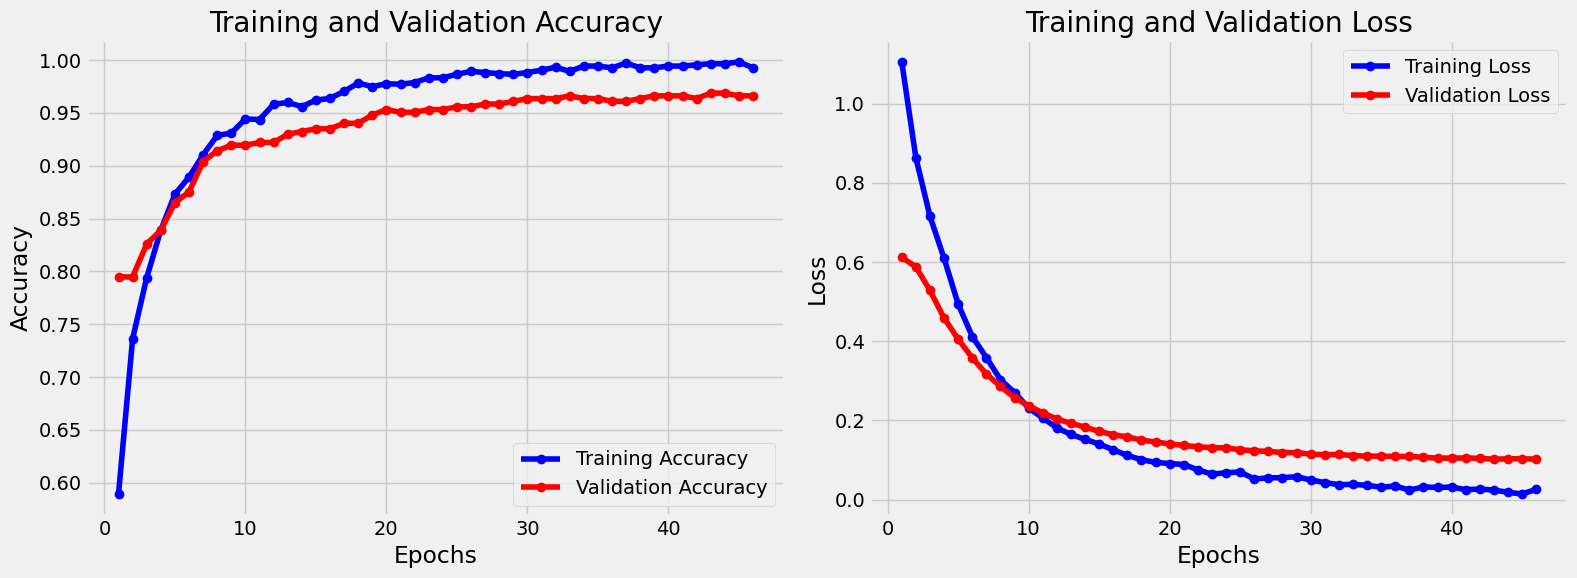

In [68]:
 model_performance(history_effnet)

Predictions

In [69]:
preds = EfficientNetB3_model.predict(test_gen_effnet)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_effnet.classes, predictions))

13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        63
           1       0.99      0.97      0.98        86
           2       0.99      0.99      0.99        72
           3       1.00      1.00      1.00        82
           4       0.96      0.95      0.96        83

    accuracy                           0.98       386
   macro avg       0.98      0.98      0.98       386
weighted avg       0.98      0.98      0.98       386



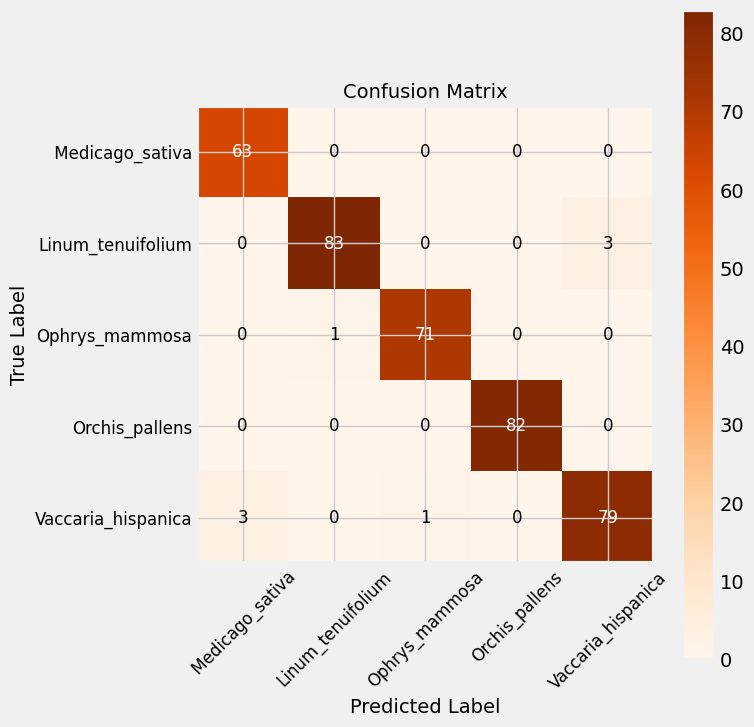

In [70]:
plot_confusion_matrix(test_gen_effnet, predictions)


In [71]:
# Save the model in Keras format
EfficientNetB3_model.save('EfficientNetB3_model.keras')

In [72]:
# Load the model in Keras format
EfficientNetB3_model = tf.keras.models.load_model('/kaggle/working/EfficientNetB3_model.keras')

EfficientNetV2-S

In [73]:
# Define key parameters for the model:

image_shape = (224, 224, 3)  # Image dimensions (Height, Width, Channels)
target_size=(224, 224)       # Target size for datagen, matches image_shape dimensions[:2]
batch_size = 32              # Batch size for model training

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for training data with augmentation
# (No rescaling, handled internally by the model)
train_aug_generator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training data
train_gen_unscaled = train_aug_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Validation and test data for EfficientNetV2-S (No external rescaling)
val_test_generator = ImageDataGenerator()

# Load validation data
val_gen_unscaled = val_test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Load test data
test_gen_unscaled = val_test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 1797 validated image filenames belonging to 5 classes.
Found 385 validated image filenames belonging to 5 classes.
Found 386 validated image filenames belonging to 5 classes.


Base Model:

In [75]:
# Callbacks Parameters:

# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

In [76]:
from tensorflow.keras.applications import EfficientNetV2S

# EfficientNetV2-S Pre-trained Model
pretrained_model = EfficientNetV2S(
    input_shape=image_shape,
    include_top=False,         # Exclude top layer
    pooling='avg',             # Apply average pooling to reduce the output dims
    weights="imagenet"         # Load pre-trained weights from ImageNet
)

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer: (EfficientNetV2-S default input size is 384x384)
inputs = keras.Input(shape=image_shape)

# Pass the inputs through the pretrained EfficientNetV2-S model
x = pretrained_model(inputs)

# Output layer (5 units for 5 flower classes with softmax activation)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
EfficientNetV2S_model = keras.Model(inputs, outputs)

# Compile the model
EfficientNetV2S_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'])

EfficientNetV2S_model.summary()

# Callbacks:  Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_efficientnetv2s_weights.weights.h5",  # Path to save the best weights
    save_best_only=True,                        # Save only the best weights
    monitor="val_loss",                         # Monitor validation loss
    mode="min",                                 # Minimize validation loss
    save_weights_only=True)                     # Save only the weights, not the entire model



# Train the model with frozen layers
history_effnetv2 = EfficientNetV2S_model.fit(
    train_gen_unscaled,
    validation_data=val_gen_unscaled,
    epochs=20,
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-s (Functional)   │ (None, 1280)           │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,337,765 (77.58 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 20,331,360 (77.56 MB)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.2373 - loss: 1.6192 - val_accuracy: 0.4338 - val_loss: 1.4109 - learning_rate: 1.0000e-04
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 986ms/step - accuracy: 0.5005 - loss: 1.3664 - val_accuracy: 0.6649 - val_loss: 1.1992 - learning_rate: 1.0000e-04
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 58s 908ms/step - accuracy: 0.6524 - loss: 1.1569 - val_accuracy: 0.7273 - val_loss: 1.0380 - learning_rate: 1.0000e-04
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 58s 909ms/step - accuracy: 0.7446 - loss: 1.0025 - val_accuracy: 0.7662 - val_loss: 0.9162 - learning_rate: 1.0000e-04
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 912ms/step - accuracy: 0.7859 - loss: 0.8855 - val_accuracy: 0.7896 - val_loss: 0.8213 - learning_rate: 1.0000e-04
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 924ms/step - accuracy: 0.8126 - loss: 0.8121 - val_accuracy: 0.8260 - val_loss: 0.7465 - learning_rate: 1.0000e-04
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 60s 933ms/step - accur

In [77]:

test_loss, test_accuracy = EfficientNetV2S_model.evaluate(test_gen_unscaled)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9223 - loss: 0.3456
Test Loss: 0.34935325384140015
Test Accuracy: 0.9196891188621521


Fine-Tuning

In [78]:
# Fine-tuning step:
# Unfreeze all layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
EfficientNetV2S_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy'])


EfficientNetV2S_model.summary()

# Fine-tune the model (with all layers trainable)
history_effnetv2 = EfficientNetV2S_model.fit(
    train_gen_unscaled,
    validation_data=val_gen_unscaled,
    epochs=50,
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

Model: "functional_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-s (Functional)   │ (None, 1280)           │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,337,765 (77.58 MB)

 Trainable params: 20,183,893 (77.00 MB)

 Non-trainable params: 153,872 (601.06 KB)

Epoch 1/50


I0000 00:00:1730922422.593184      72 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_16', 28 bytes spill stores, 28 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_21', 24 bytes spill stores, 24 bytes spill loads



35/57 ━━━━━━━━━━━━━━━━━━━━ 18s 822ms/step - accuracy: 0.6426 - loss: 1.0780

I0000 00:00:1730922596.500496      70 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 24 bytes spill stores, 24 bytes spill loads



57/57 ━━━━━━━━━━━━━━━━━━━━ 448s 4s/step - accuracy: 0.6567 - loss: 1.0492 - val_accuracy: 0.7818 - val_loss: 0.7599 - learning_rate: 1.0000e-05
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 62s 978ms/step - accuracy: 0.7917 - loss: 0.7583 - val_accuracy: 0.8571 - val_loss: 0.5740 - learning_rate: 1.0000e-05
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 63s 999ms/step - accuracy: 0.8506 - loss: 0.5769 - val_accuracy: 0.8883 - val_loss: 0.4500 - learning_rate: 1.0000e-05


Evaluating the Model

In [79]:
train_score = EfficientNetV2S_model.evaluate(train_gen_unscaled)
valid_score = EfficientNetV2S_model.evaluate(val_gen_unscaled)
test_score = EfficientNetV2S_model.evaluate(test_gen_unscaled)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

57/57 ━━━━━━━━━━━━━━━━━━━━ 57s 999ms/step - accuracy: 0.8018 - loss: 0.7269
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 505ms/step - accuracy: 0.7978 - loss: 0.7274
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 849ms/step - accuracy: 0.7881 - loss: 0.7536
--------------------
Train Loss:  0.7279845476150513
Train Accuracy:  0.8169170618057251
--------------------
Validation Loss:  0.7599121928215027
Validation Accuracy:  0.7818182110786438
--------------------
Test Loss:  0.7677907943725586
Test Accuracy:  0.7694300413131714
--------------------


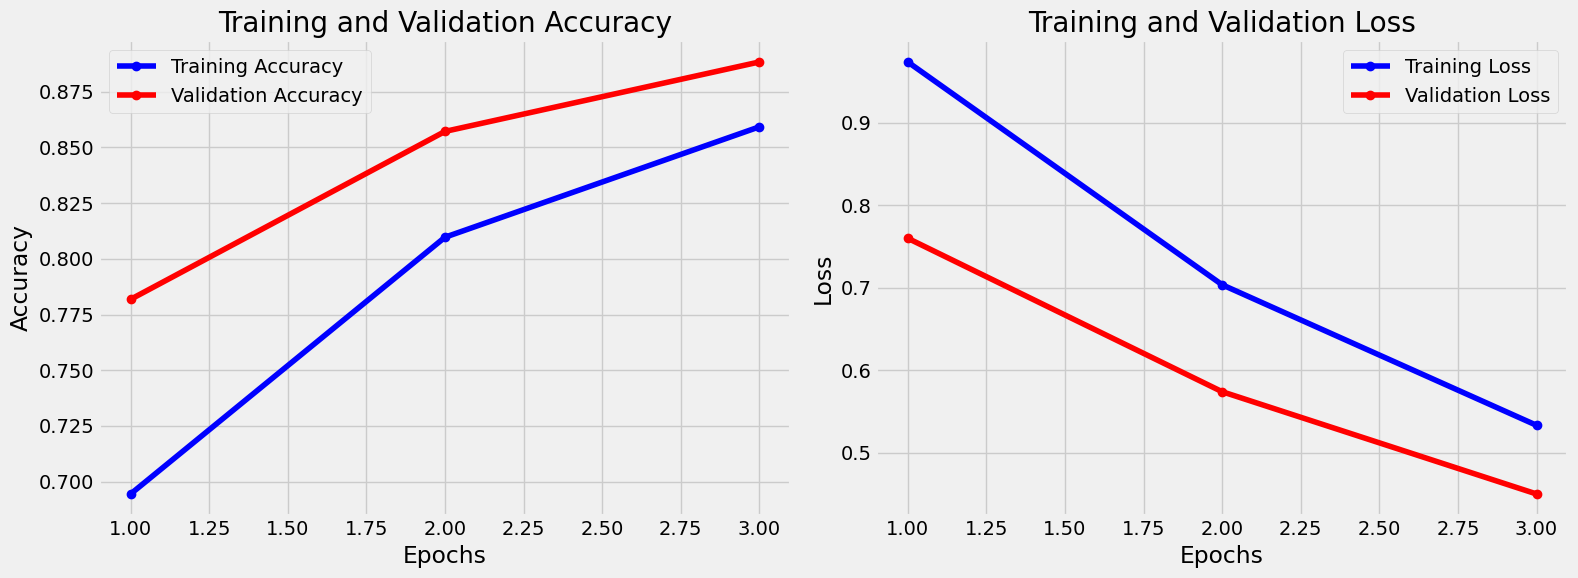

In [80]:
 model_performance(history_effnetv2)


Predictions

In [81]:
preds = EfficientNetV2S_model.predict(test_gen_unscaled)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_unscaled.classes, predictions))

13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step
              precision    recall  f1-score   support

           0       0.74      0.59      0.65        63
           1       0.65      0.80      0.72        86
           2       0.92      0.90      0.91        72
           3       0.81      0.93      0.86        82
           4       0.77      0.60      0.68        83

    accuracy                           0.77       386
   macro avg       0.78      0.76      0.76       386
weighted avg       0.77      0.77      0.77       386



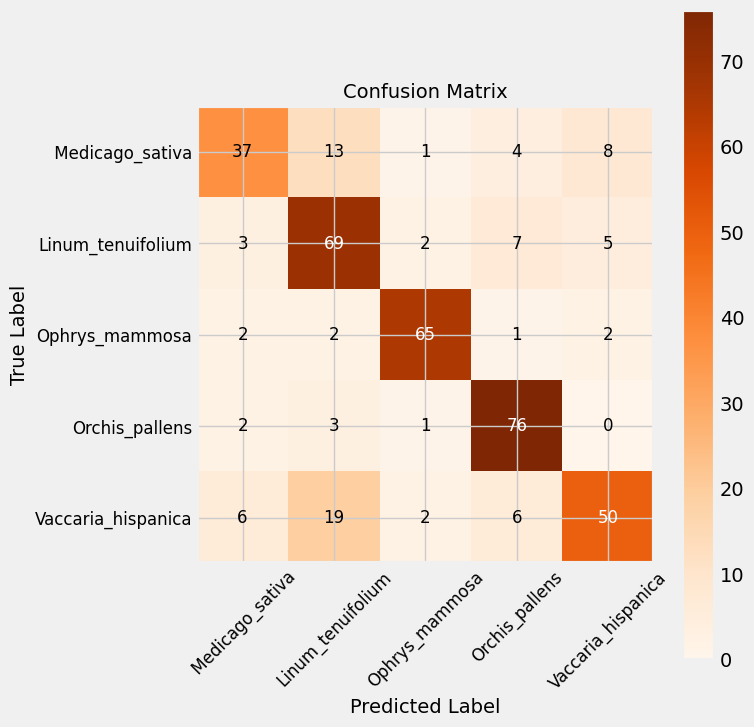

In [82]:
plot_confusion_matrix(test_gen_unscaled, predictions)


In [83]:
# Save the model in Keras format
EfficientNetV2S_model.save('EfficientNetV2S_model.keras')

In [84]:
# Load the model in Keras format
EfficientNetV2S_model = tf.keras.models.load_model('/kaggle/working/EfficientNetV2S_model.keras')

ConvNeXtTiny Model

In [85]:
# Callbacks Parameters:

# EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=0.00001)

In [86]:
from tensorflow.keras.applications import ConvNeXtTiny

# ConvNeXtTiny Pre-trained Model
pretrained_model = ConvNeXtTiny(
    input_shape=image_shape,
    include_top=False,         # Exclude top layer
    pooling='avg',             # Apply average pooling to reduce the output dims
    weights="imagenet"         # Load pre-trained weights from ImageNet
)

# Freeze the pre-trained model initially
pretrained_model.trainable = False

# Input layer: (ConvNeXtTiny default input size is 224x224)
inputs = keras.Input(shape=image_shape)

# Pass the inputs through the pretrained ConvNeXtTiny model
x = pretrained_model(inputs)

# Output layer (5 units for 5 flower classes with softmax activation)
outputs = keras.layers.Dense(5, activation='softmax')(x)

# Create the model using Functional API
ConvNeXtTiny_model = keras.Model(inputs, outputs)

# Compile the model
ConvNeXtTiny_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'])


ConvNeXtTiny_model.summary()

# Callbacks: Save the best model's weights using ModelCheckpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_convnexttiny_weights.weights.h5",  # Path to save the best weights
    save_best_only=True,                     # Save only the best weights
    monitor="val_loss",                      # Monitor validation loss
    mode="min",                              # Minimize validation loss
    save_weights_only=True)                  # Save only the weights, not the entire model


# Train the model with frozen layers
history_cnv = ConvNeXtTiny_model.fit(
    train_gen_unscaled,
    validation_data=val_gen_unscaled,
    epochs=20,
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_tiny (Functional)      │ (None, 768)            │    27,820,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         3,845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,823,973 (106.14 MB)

 Trainable params: 3,845 (15.02 KB)

 Non-trainable params: 27,820,128 (106.13 MB)

Epoch 1/20


I0000 00:00:1730922962.519778    4295 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 1744 bytes spill stores, 1748 bytes spill loads

I0000 00:00:1730922968.559993    4292 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_30', 1300 bytes spill stores, 1284 bytes spill loads



32/57 ━━━━━━━━━━━━━━━━━━━━ 22s 888ms/step - accuracy: 0.2638 - loss: 1.8857

I0000 00:00:1730923013.312945    4332 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 1744 bytes spill stores, 1748 bytes spill loads

I0000 00:00:1730923014.783276    4329 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_30', 1300 bytes spill stores, 1284 bytes spill loads



57/57 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.2859 - loss: 1.7938 - val_accuracy: 0.4338 - val_loss: 1.4202 - learning_rate: 1.0000e-04
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 58s 916ms/step - accuracy: 0.4317 - loss: 1.3753 - val_accuracy: 0.5584 - val_loss: 1.1650 - learning_rate: 1.0000e-04
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 921ms/step - accuracy: 0.5954 - loss: 1.0665 - val_accuracy: 0.6338 - val_loss: 0.9862 - learning_rate: 1.0000e-04
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 60s 942ms/step - accuracy: 0.6930 - loss: 0.9086 - val_accuracy: 0.6961 - val_loss: 0.8501 - learning_rate: 1.0000e-04
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 54s 842ms/step - accuracy: 0.7416 - loss: 0.7850 - val_accuracy: 0.7325 - val_loss: 0.7516 - learning_rate: 1.0000e-04
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 54s 844ms/step - accuracy: 0.7659 - loss: 0.6709 - val_accuracy: 0.7662 - val_loss: 0.6708 - learning_rate: 1.0000e-04
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 833ms/step - accuracy: 0.7951

In [87]:
test_loss, test_accuracy = ConvNeXtTiny_model.evaluate(test_gen_unscaled)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.8892 - loss: 0.3528

I0000 00:00:1730924126.055821    4609 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 1744 bytes spill stores, 1748 bytes spill loads

I0000 00:00:1730924130.015852    4610 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_30', 1300 bytes spill stores, 1284 bytes spill loads



13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8903 - loss: 0.3506
Test Loss: 0.33727118372917175
Test Accuracy: 0.8963730335235596


Fine-Tuning

In [88]:
# Fine-tuning step:
# Unfreeze all layers for fine-tuning
pretrained_model.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
ConvNeXtTiny_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy'])

ConvNeXtTiny_model.summary()

# Fine-tune the model (with all layers trainable)
history_cnv = ConvNeXtTiny_model.fit(
    train_gen_unscaled,
    validation_data=val_gen_unscaled,
    epochs=50,
    callbacks=[early_stop, lr_scheduler, checkpoint_cb])

Model: "functional_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_tiny (Functional)      │ (None, 768)            │    27,820,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         3,845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,823,973 (106.14 MB)

 Trainable params: 27,823,973 (106.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


I0000 00:00:1730924192.061514    4646 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_42', 2464 bytes spill stores, 2468 bytes spill loads

I0000 00:00:1730924192.757193    4643 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_36', 1776 bytes spill stores, 1768 bytes spill loads

I0000 00:00:1730924207.255436      70 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_50', 64 bytes spill stores, 64 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_46', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_34', 44 bytes spill stores, 44 bytes spill loads



20/57 ━━━━━━━━━━━━━━━━━━━━ 30s 814ms/step - accuracy: 0.9193 - loss: 0.2656

I0000 00:00:1730924237.098863    4677 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_36', 1776 bytes spill stores, 1768 bytes spill loads

I0000 00:00:1730924243.306851    4679 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_42', 2464 bytes spill stores, 2468 bytes spill loads

I0000 00:00:1730924244.552387    4676 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_66', 3836 bytes spill stores, 6956 bytes spill loads

I0000 00:00:1730924259.410804      70 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_55', 64 bytes spill stores, 64 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_53', 24 bytes spill stores, 24 bytes spill loads



57/57 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.9262 - loss: 0.2482 - val_accuracy: 0.9403 - val_loss: 0.2029 - learning_rate: 1.0000e-05
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 69s 932ms/step - accuracy: 0.9551 - loss: 0.1562 - val_accuracy: 0.9558 - val_loss: 0.1600 - learning_rate: 1.0000e-05
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 58s 916ms/step - accuracy: 0.9740 - loss: 0.1050 - val_accuracy: 0.9714 - val_loss: 0.1319 - learning_rate: 1.0000e-05
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 58s 908ms/step - accuracy: 0.9848 - loss: 0.0663 - val_accuracy: 0.9714 - val_loss: 0.1256 - learning_rate: 1.0000e-05
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 58s 907ms/step - accuracy: 0.9834 - loss: 0.0598 - val_accuracy: 0.9792 - val_loss: 0.1057 - learning_rate: 1.0000e-05
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 58s 900ms/step - accuracy: 0.9888 - loss: 0.0434 - val_accuracy: 0.9740 - val_loss: 0.0992 - learning_rate: 1.0000e-05
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 57s 892ms/step - accuracy: 0.9941

In [89]:
train_score = ConvNeXtTiny_model.evaluate(train_gen_unscaled)
valid_score = ConvNeXtTiny_model.evaluate(val_gen_unscaled)
test_score = ConvNeXtTiny_model.evaluate(test_gen_unscaled)

print('-' * 20)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print('-' * 20)

57/57 ━━━━━━━━━━━━━━━━━━━━ 52s 914ms/step - accuracy: 1.0000 - loss: 0.0054
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 519ms/step - accuracy: 0.9765 - loss: 0.0677
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 652ms/step - accuracy: 0.9781 - loss: 0.0620
--------------------
Train Loss:  0.005010873079299927
Train Accuracy:  1.0
--------------------
Validation Loss:  0.07306007295846939
Validation Accuracy:  0.9766233563423157
--------------------
Test Loss:  0.06188618391752243
Test Accuracy:  0.9818652868270874
--------------------


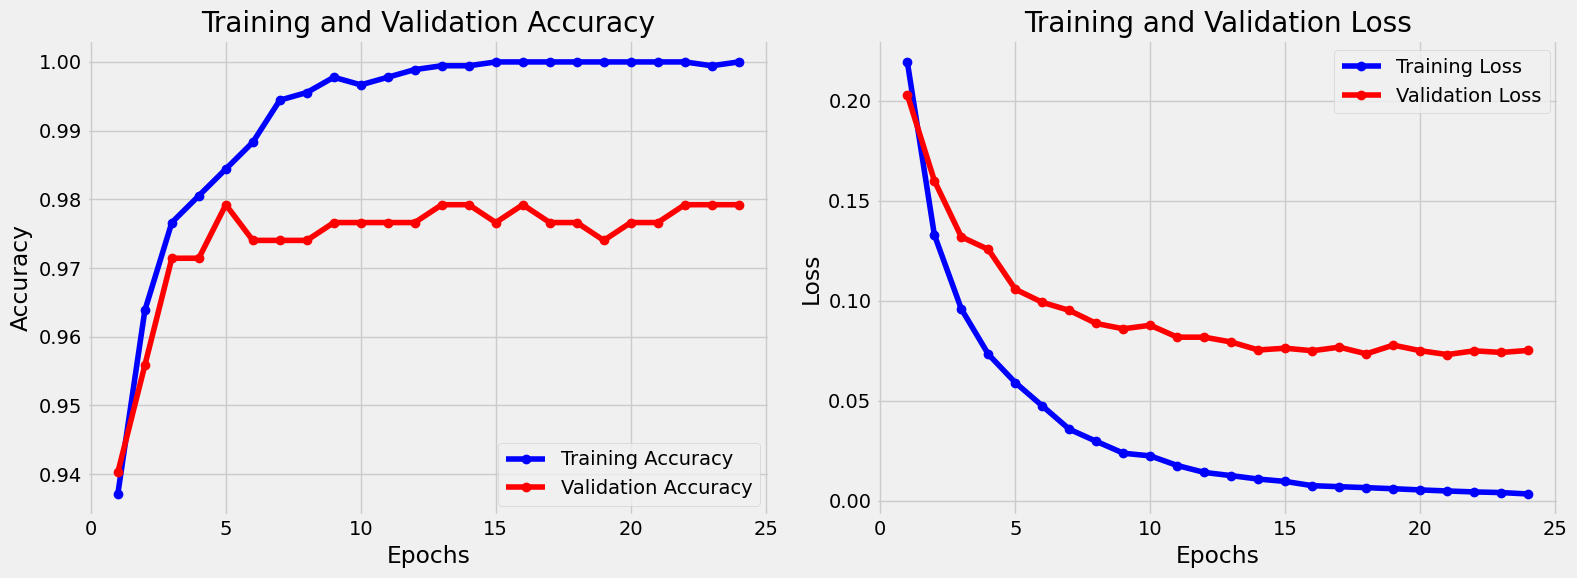

In [90]:
 model_performance(history_cnv)


In [91]:
preds = ConvNeXtTiny_model.predict(test_gen_unscaled)
predictions = np.argmax(preds, axis=1)

# Evaluate the Performance Metric Scores:
print(classification_report(test_gen_unscaled.classes, predictions))

13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 722ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.97      0.97      0.97        86
           2       1.00      0.99      0.99        72
           3       0.99      1.00      0.99        82
           4       0.96      0.99      0.98        83

    accuracy                           0.98       386
   macro avg       0.98      0.98      0.98       386
weighted avg       0.98      0.98      0.98       386



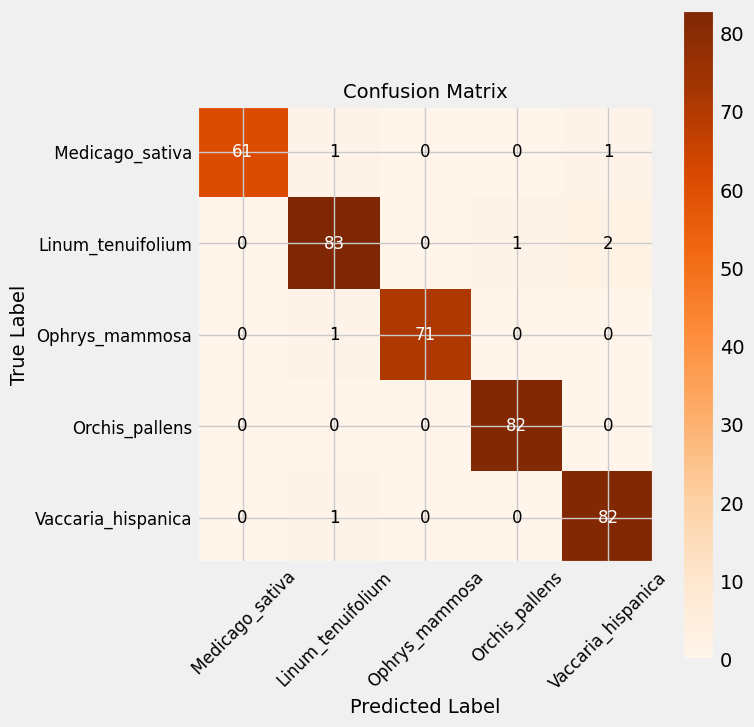

In [92]:
plot_confusion_matrix(test_gen_unscaled, predictions)


In [93]:
# Save the model in Keras format
ConvNeXtTiny_model.save('ConvNeXtTiny_model.keras')

In [94]:
# Load the model in Keras format
ConvNeXtTiny_model = tf.keras.models.load_model('/kaggle/working/ConvNeXtTiny_model.keras')



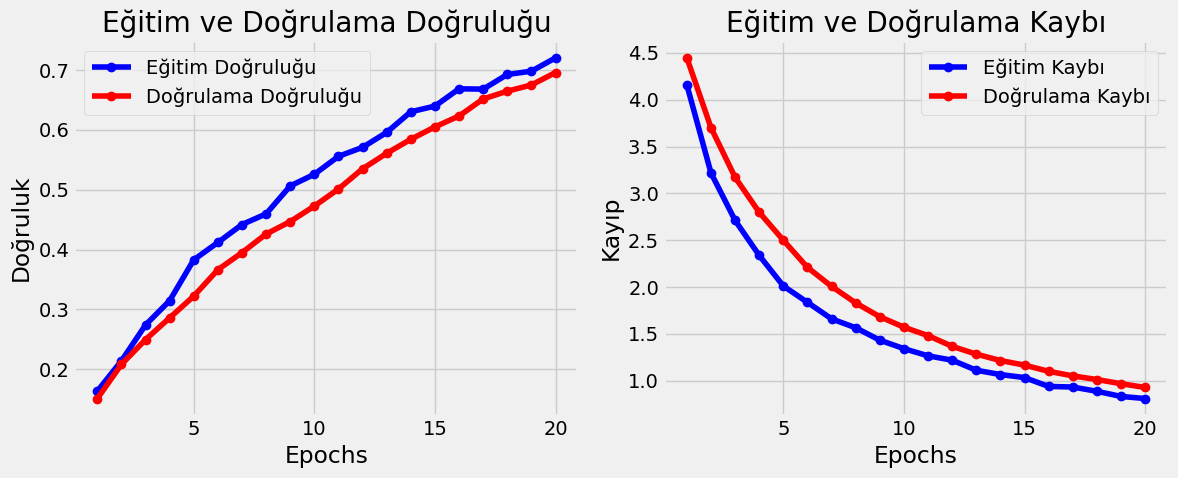

In [95]:
import matplotlib.pyplot as plt

# Doğruluk oranlarını ve kayıp oranlarını history nesnesinden al
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Epoch sayısını belirle
epochs = range(1, len(acc) + 1)

# Doğruluk oranları grafiği
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Eğitim Doğruluğu')
plt.plot(epochs, val_acc, 'ro-', label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()

# Kayıp oranları grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'ro-', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()
